In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
plt.style.use('fivethirtyeight')

In [45]:
data = pd.read_csv('dataset/imdb_ratings.csv')
data

,Unnamed: 0,titleId,title,averageRating,numVotes
0,0,tt0000001,Carmencita,5.7,1676
1,1,tt0000002,Le clown et ses chiens,6.1,208
2,2,tt0000003,Pauvre Pierrot,6.5,1404
3,3,tt0000004,Un bon bock,6.2,123
4,4,tt0000005,Blacksmith Scene,6.2,2200
...,...,...,...,...,...
67403,67404,tt9916270,Il talento del calabrone,5.7,853
67404,67405,tt9916362,Akelarre,5.8,199
67405,67406,tt9916428,Hong xing zhao yao Zhong guo,3.8,12
67406,67407,tt9916460,Pink Taxi,9.2,12


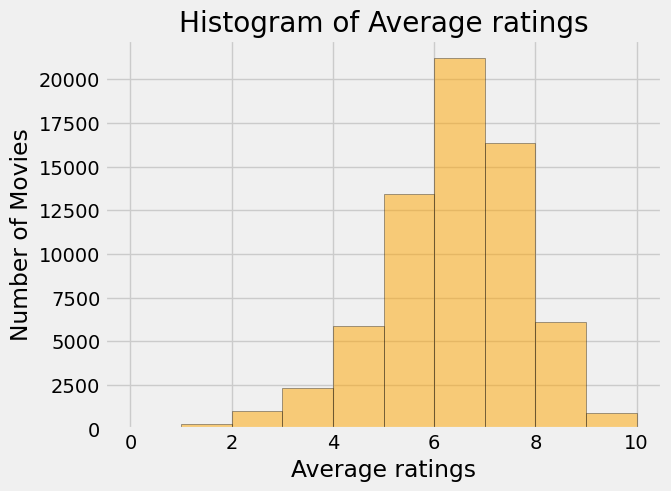

In [46]:
plt.title("Histogram of Average ratings")

plt.xlabel('Average ratings')
plt.ylabel('Number of Movies')
plt.hist(data['averageRating'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], color='#FFA500', alpha=0.5, edgecolor='k')
plt.show()

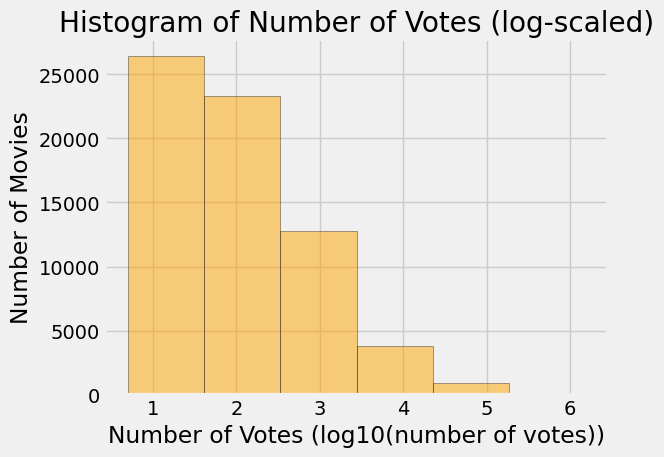

In [47]:
plt.title("Histogram of Number of Votes (log-scaled)")

log_scale = np.log10(data['numVotes'])

# plt.xscale("log")
plt.hist(log_scale, bins=6, edgecolor='k', color="#FFA500", alpha=0.5)
plt.xlabel("Number of Votes (log10(number of votes))")
# plt.xticks(ticks=log_scale, labels=data['numVotes'])
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()

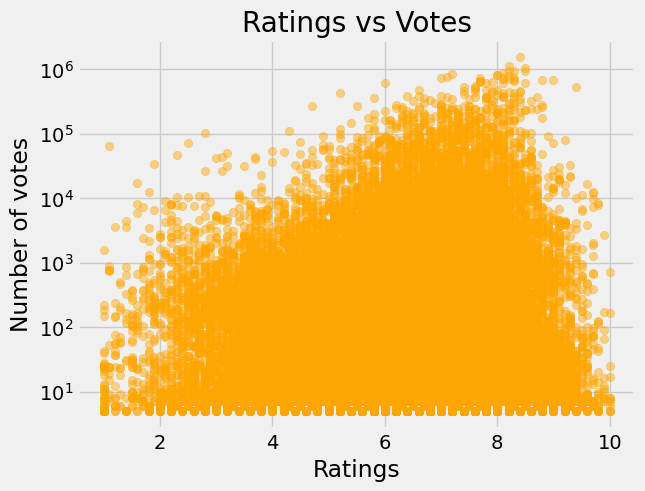

In [48]:
plt.title("Ratings vs Votes")

plt.yscale("log")
plt.xlabel("Ratings")
plt.ylabel("Number of votes")

plt.scatter(data['averageRating'], data['numVotes'], c='#FFA500', alpha=0.45)
plt.show()


In [49]:
moviesWithHighVotesHenceMatters = data[data['numVotes'] >= 10000]

numOfMoviesPerRatingValue = moviesWithHighVotesHenceMatters['averageRating'].value_counts()

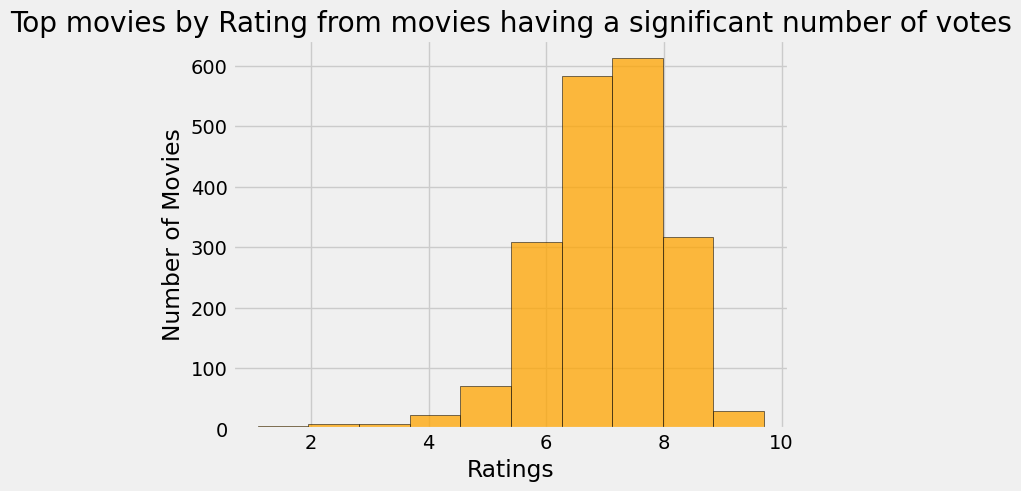

In [50]:
plt.title("Top movies by Rating from movies having a significant number of votes")

plt.hist(moviesWithHighVotesHenceMatters['averageRating'], bins=10, color='#FFA500', edgecolor='k', alpha=0.75)

plt.xlabel('Ratings')
plt.ylabel('Number of Movies')
plt.show()

In [51]:
highestVotedNumber = data['numVotes'].quantile(0.99) 
filt = (data['numVotes'] >= highestVotedNumber)
top_one_percent = data[filt]
top_one_percent.sort_values(by='numVotes', ascending=False)

,Unnamed: 0,titleId,title,averageRating,numVotes
44770,44771,tt1345836,The Dark Knight Rises,8.4,1515727
35182,35182,tt1130884,Shutter Island,8.2,1129155
18956,18956,tt0088763,Back to the Future,8.5,1057549
17122,17122,tt0086190,Star Wars: Episode VI - Return of the Jedi,8.3,950081
46801,46802,tt7286456,Joker,8.5,937904
...,...,...,...,...,...
18255,18255,tt0087781,The Natural,7.5,44162
195,195,tt0000417,Le voyage dans la lune,8.2,44126
21742,21742,tt0092610,Bad Taste,6.6,44093
23725,23725,tt0095271,Halloween 4: The Return of Michael Myers,5.9,44066


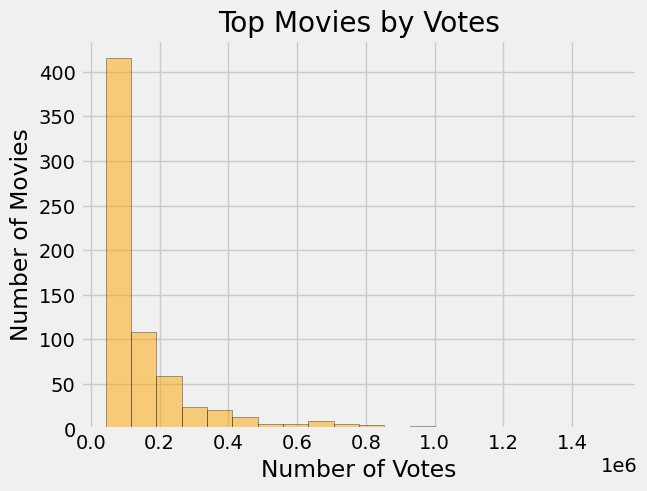

In [52]:
plt.title("Top Movies by Votes")

plt.hist(top_one_percent['numVotes'], bins=20, color='#FFA500', alpha=0.5, edgecolor='k')
plt.xlabel("Number of Votes")
plt.ylabel("Number of Movies")
plt.show()


In [53]:
sortedByNUmberOfVotes = data.sort_values(by='numVotes', ascending=False)
sortedByNUmberOfVotes

,Unnamed: 0,titleId,title,averageRating,numVotes
44770,44771,tt1345836,The Dark Knight Rises,8.4,1515727
35182,35182,tt1130884,Shutter Island,8.2,1129155
18956,18956,tt0088763,Back to the Future,8.5,1057549
17122,17122,tt0086190,Star Wars: Episode VI - Return of the Jedi,8.3,950081
46801,46802,tt7286456,Joker,8.5,937904
...,...,...,...,...,...
34035,34035,tt10982160,Solidarity,5.8,5
34041,34041,tt1098228,Ultimate Sci-Fi Quiz,6.0,5
65447,65448,tt9588358,Door Wilskracht Sterk,6.8,5
34552,34552,tt11078016,Gjennom asken,7.2,5


In [54]:
sortedByNUmberOfVotes.index = np.arange(len(list(sortedByNUmberOfVotes['Unnamed: 0'])))

In [55]:
sortedByNUmberOfVotes

,Unnamed: 0,titleId,title,averageRating,numVotes
0,44771,tt1345836,The Dark Knight Rises,8.4,1515727
1,35182,tt1130884,Shutter Island,8.2,1129155
2,18956,tt0088763,Back to the Future,8.5,1057549
3,17122,tt0086190,Star Wars: Episode VI - Return of the Jedi,8.3,950081
4,46802,tt7286456,Joker,8.5,937904
...,...,...,...,...,...
67403,34035,tt10982160,Solidarity,5.8,5
67404,34041,tt1098228,Ultimate Sci-Fi Quiz,6.0,5
67405,65448,tt9588358,Door Wilskracht Sterk,6.8,5
67406,34552,tt11078016,Gjennom asken,7.2,5


In [56]:
sortedByNUmberOfVotes['cumulativeVotes'] = [np.nan for n in sortedByNUmberOfVotes.index]
sortedByNUmberOfVotes

,Unnamed: 0,titleId,title,averageRating,numVotes,cumulativeVotes
0,44771,tt1345836,The Dark Knight Rises,8.4,1515727,NaN
1,35182,tt1130884,Shutter Island,8.2,1129155,NaN
2,18956,tt0088763,Back to the Future,8.5,1057549,NaN
3,17122,tt0086190,Star Wars: Episode VI - Return of the Jedi,8.3,950081,NaN
4,46802,tt7286456,Joker,8.5,937904,NaN
...,...,...,...,...,...,...
67403,34035,tt10982160,Solidarity,5.8,5,NaN
67404,34041,tt1098228,Ultimate Sci-Fi Quiz,6.0,5,NaN
67405,65448,tt9588358,Door Wilskracht Sterk,6.8,5,NaN
67406,34552,tt11078016,Gjennom asken,7.2,5,NaN


In [57]:
sortedByNUmberOfVotes.at[0, 'cumulativeVotes'] = sortedByNUmberOfVotes.at[0, 'numVotes']
sortedByNUmberOfVotes

,Unnamed: 0,titleId,title,averageRating,numVotes,cumulativeVotes
0,44771,tt1345836,The Dark Knight Rises,8.4,1515727,1515727.0
1,35182,tt1130884,Shutter Island,8.2,1129155,NaN
2,18956,tt0088763,Back to the Future,8.5,1057549,NaN
3,17122,tt0086190,Star Wars: Episode VI - Return of the Jedi,8.3,950081,NaN
4,46802,tt7286456,Joker,8.5,937904,NaN
...,...,...,...,...,...,...
67403,34035,tt10982160,Solidarity,5.8,5,NaN
67404,34041,tt1098228,Ultimate Sci-Fi Quiz,6.0,5,NaN
67405,65448,tt9588358,Door Wilskracht Sterk,6.8,5,NaN
67406,34552,tt11078016,Gjennom asken,7.2,5,NaN


In [58]:
data.index.name = 'my_index'
data

,Unnamed: 0,titleId,title,averageRating,numVotes
my_index,,,,,
0,0,tt0000001,Carmencita,5.7,1676
1,1,tt0000002,Le clown et ses chiens,6.1,208
2,2,tt0000003,Pauvre Pierrot,6.5,1404
3,3,tt0000004,Un bon bock,6.2,123
4,4,tt0000005,Blacksmith Scene,6.2,2200
...,...,...,...,...,...
67403,67404,tt9916270,Il talento del calabrone,5.7,853
67404,67405,tt9916362,Akelarre,5.8,199
67405,67406,tt9916428,Hong xing zhao yao Zhong guo,3.8,12


In [59]:
sortedByNUmberOfVotes

,Unnamed: 0,titleId,title,averageRating,numVotes,cumulativeVotes
0,44771,tt1345836,The Dark Knight Rises,8.4,1515727,1515727.0
1,35182,tt1130884,Shutter Island,8.2,1129155,NaN
2,18956,tt0088763,Back to the Future,8.5,1057549,NaN
3,17122,tt0086190,Star Wars: Episode VI - Return of the Jedi,8.3,950081,NaN
4,46802,tt7286456,Joker,8.5,937904,NaN
...,...,...,...,...,...,...
67403,34035,tt10982160,Solidarity,5.8,5,NaN
67404,34041,tt1098228,Ultimate Sci-Fi Quiz,6.0,5,NaN
67405,65448,tt9588358,Door Wilskracht Sterk,6.8,5,NaN
67406,34552,tt11078016,Gjennom asken,7.2,5,NaN


In [60]:
sortedByNUmberOfVotes['cumulativeVotes'] = sortedByNUmberOfVotes['numVotes'].cumsum()
sortedByNUmberOfVotes

,Unnamed: 0,titleId,title,averageRating,numVotes,cumulativeVotes
0,44771,tt1345836,The Dark Knight Rises,8.4,1515727,1515727
1,35182,tt1130884,Shutter Island,8.2,1129155,2644882
2,18956,tt0088763,Back to the Future,8.5,1057549,3702431
3,17122,tt0086190,Star Wars: Episode VI - Return of the Jedi,8.3,950081,4652512
4,46802,tt7286456,Joker,8.5,937904,5590416
...,...,...,...,...,...,...
67403,34035,tt10982160,Solidarity,5.8,5,162328800
67404,34041,tt1098228,Ultimate Sci-Fi Quiz,6.0,5,162328805
67405,65448,tt9588358,Door Wilskracht Sterk,6.8,5,162328810
67406,34552,tt11078016,Gjennom asken,7.2,5,162328815


In [61]:
sortedByNUmberOfVotes['movieNum'] = sortedByNUmberOfVotes.index
sortedByNUmberOfVotes

,Unnamed: 0,titleId,title,averageRating,numVotes,cumulativeVotes,movieNum
0,44771,tt1345836,The Dark Knight Rises,8.4,1515727,1515727,0
1,35182,tt1130884,Shutter Island,8.2,1129155,2644882,1
2,18956,tt0088763,Back to the Future,8.5,1057549,3702431,2
3,17122,tt0086190,Star Wars: Episode VI - Return of the Jedi,8.3,950081,4652512,3
4,46802,tt7286456,Joker,8.5,937904,5590416,4
...,...,...,...,...,...,...,...
67403,34035,tt10982160,Solidarity,5.8,5,162328800,67403
67404,34041,tt1098228,Ultimate Sci-Fi Quiz,6.0,5,162328805,67404
67405,65448,tt9588358,Door Wilskracht Sterk,6.8,5,162328810,67405
67406,34552,tt11078016,Gjennom asken,7.2,5,162328815,67406


In [62]:
sortedByNUmberOfVotes['movieNum'] = sortedByNUmberOfVotes['movieNum'] - 8

In [63]:
sortedByNUmberOfVotes

,Unnamed: 0,titleId,title,averageRating,numVotes,cumulativeVotes,movieNum
0,44771,tt1345836,The Dark Knight Rises,8.4,1515727,1515727,-8
1,35182,tt1130884,Shutter Island,8.2,1129155,2644882,-7
2,18956,tt0088763,Back to the Future,8.5,1057549,3702431,-6
3,17122,tt0086190,Star Wars: Episode VI - Return of the Jedi,8.3,950081,4652512,-5
4,46802,tt7286456,Joker,8.5,937904,5590416,-4
...,...,...,...,...,...,...,...
67403,34035,tt10982160,Solidarity,5.8,5,162328800,67395
67404,34041,tt1098228,Ultimate Sci-Fi Quiz,6.0,5,162328805,67396
67405,65448,tt9588358,Door Wilskracht Sterk,6.8,5,162328810,67397
67406,34552,tt11078016,Gjennom asken,7.2,5,162328815,67398


In [64]:
totalMovie = sortedByNUmberOfVotes['movieNum'].iloc[-1]
totalVotes = sortedByNUmberOfVotes['cumulativeVotes'].iloc[-1]

sortedByNUmberOfVotes['percentOfMovie'] = (sortedByNUmberOfVotes['movieNum'] / totalMovie) * 100
sortedByNUmberOfVotes['percentOfVotes'] = (sortedByNUmberOfVotes['cumulativeVotes'] / totalVotes) * 100
sortedByNUmberOfVotes

,Unnamed: 0,titleId,title,averageRating,numVotes,cumulativeVotes,movieNum,percentOfMovie,percentOfVotes
0,44771,tt1345836,The Dark Knight Rises,8.4,1515727,1515727,-8,-0.011870,0.933739
1,35182,tt1130884,Shutter Island,8.2,1129155,2644882,-7,-0.010386,1.629336
2,18956,tt0088763,Back to the Future,8.5,1057549,3702431,-6,-0.008902,2.280822
3,17122,tt0086190,Star Wars: Episode VI - Return of the Jedi,8.3,950081,4652512,-5,-0.007419,2.866104
4,46802,tt7286456,Joker,8.5,937904,5590416,-4,-0.005935,3.443884
...,...,...,...,...,...,...,...,...,...
67403,34035,tt10982160,Solidarity,5.8,5,162328800,67395,99.994065,99.999988
67404,34041,tt1098228,Ultimate Sci-Fi Quiz,6.0,5,162328805,67396,99.995549,99.999991
67405,65448,tt9588358,Door Wilskracht Sterk,6.8,5,162328810,67397,99.997033,99.999994
67406,34552,tt11078016,Gjennom asken,7.2,5,162328815,67398,99.998516,99.999997


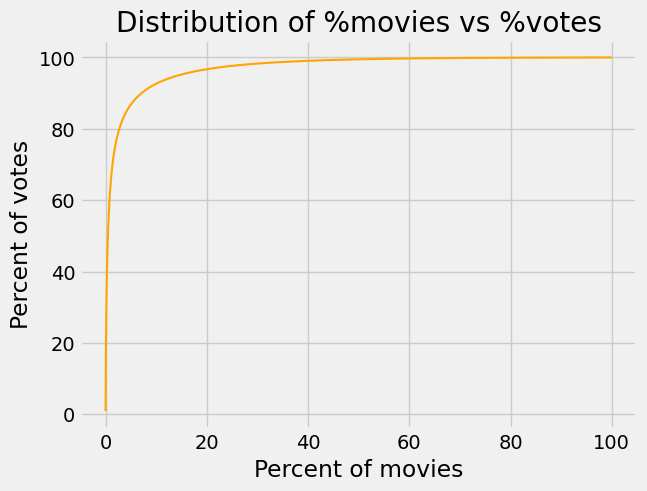

In [65]:
plt.title("Distribution of %movies vs %votes")

plt.xlabel("Percent of movies")
plt.ylabel("Percent of votes")
plt.plot(sortedByNUmberOfVotes['percentOfMovie'], sortedByNUmberOfVotes['percentOfVotes'], linewidth = 1.5, color='#FFA500')
plt.show()

In [66]:
filt = ((data['averageRating'] <= 5) & (data['averageRating'] >= 0))
zeroToFiveBin = data[filt]
zeroToFiveBin

,Unnamed: 0,titleId,title,averageRating,numVotes
my_index,,,,,
16,16,tt0000017,Italienischer Bauerntanz,4.6,248
18,18,tt0000020,The Derby 1895,4.9,276
21,21,tt0000024,Opening of the Kiel Canal,4.4,58
32,32,tt0000036,Awakening of Rip,4.4,503
33,33,tt0000037,Baignade en mer,4.5,40
...,...,...,...,...,...
67386,67387,tt9914458,Alien Messiah,2.9,40
67387,67388,tt9914546,Moja Generacija Z,4.3,119
67400,67401,tt9916190,Safeguard,3.2,139


In [67]:
filt = ((data['averageRating'] > 5) & (data['averageRating'] <= 6))
fiveToSixBin = data[filt]
fiveToSixBin

,Unnamed: 0,titleId,title,averageRating,numVotes
my_index,,,,,
0,0,tt0000001,Carmencita,5.7,1676
5,5,tt0000006,Chinese Opium Den,5.3,120
6,6,tt0000007,Corbett and Courtney Before the Kinetograph,5.4,672
7,7,tt0000008,Edison Kinetoscopic Record of a Sneeze,5.4,1851
8,8,tt0000009,Miss Jerry,6.0,156
...,...,...,...,...,...
67383,67384,tt9914192,No Gogó do Paulinho,5.4,126
67393,67394,tt9915156,Tree in the River,6.0,7
67399,67400,tt9916038,Eco,5.6,11


In [68]:
filt = ((data['averageRating'] > 6) & (data['averageRating'] <= 7))
sixToSevenBin = data[filt]
sixToSevenBin

,Unnamed: 0,titleId,title,averageRating,numVotes
my_index,,,,,
1,1,tt0000002,Le clown et ses chiens,6.1,208
2,2,tt0000003,Pauvre Pierrot,6.5,1404
3,3,tt0000004,Un bon bock,6.2,123
4,4,tt0000005,Blacksmith Scene,6.2,2200
9,9,tt0000010,La sortie de l'usine Lumière à Lyon,6.9,6191
...,...,...,...,...,...
67390,67391,tt9914942,La vida sense la Sara Amat,6.7,115
67391,67392,tt9915022,Yarali Kuslar,6.9,39
67394,67395,tt9915520,Fascism i en svart bil,6.8,6


In [69]:
filt = ((data['averageRating'] > 7) & (data['averageRating'] <= 8))
sevenToEightBin = data[filt]
sevenToEightBin

,Unnamed: 0,titleId,title,averageRating,numVotes
my_index,,,,,
11,11,tt0000012,L'arrivée d'un train à La Ciotat,7.4,10623
13,13,tt0000014,L'arroseur arrosé,7.1,4736
130,130,tt0000211,La lune à un mètre,7.5,3499
176,176,tt0000359,L'homme à la tête en caoutchouc,7.1,2563
184,184,tt0000380,La belle au bois dormant,7.2,13
...,...,...,...,...,...
67384,67385,tt9914254,Kirsebæreventyret,7.9,7
67395,67396,tt9915526,A Volta para Casa,7.9,19
67396,67397,tt9915686,Khatra Khatra Khatra,7.1,181


In [70]:
filt = ((data['averageRating'] > 8) & (data['averageRating'] <= 9))
eightToNineBin = data[filt]
eightToNineBin

,Unnamed: 0,titleId,title,averageRating,numVotes
my_index,,,,,
195,195,tt0000417,Le voyage dans la lune,8.2,44126
227,227,tt0000505,La course à la perruque,8.1,11
470,470,tt0001456,White Roses,8.5,8
574,574,tt0002145,The Dream of a Moving Picture Director,8.7,7
593,593,tt0002234,Ett hemligt giftermål,8.5,13
...,...,...,...,...,...
67347,67348,tt9904844,Ott Tänak: The Movie,8.3,442
67350,67351,tt9905462,Pengalila,8.4,590
67365,67366,tt9909248,Race Across the World,8.3,404


In [71]:
filt = ((data['averageRating'] > 9) & (data['averageRating'] <= 10))
nineToTenBin = data[filt]
nineToTenBin

,Unnamed: 0,titleId,title,averageRating,numVotes
my_index,,,,,
1116,1116,tt0006371,Arms and the Woman,9.2,5
1257,1257,tt0007229,Purity,9.2,5
1434,1434,tt0008528,A Régiséggyüjtö,9.2,8
1672,1672,tt0009851,Álarcosbál,9.4,7
2213,2213,tt0012297,Golod... golod... golod,9.4,12
...,...,...,...,...,...
67125,67126,tt9866712,Aadim Vichar,9.8,14
67277,67278,tt9893806,IZZAT feat. BRBN: Another Life,9.1,504
67357,67358,tt9906388,Jock Butt,9.2,34


In [72]:
averageVotes = []

dfs = [zeroToFiveBin['numVotes'], fiveToSixBin['numVotes'], sixToSevenBin['numVotes'], sevenToEightBin['numVotes'], eightToNineBin['numVotes'], nineToTenBin['numVotes']]

for df in dfs:
    averageVotes.append(df.mean())

averageVotesSeries = pd.Series(averageVotes)

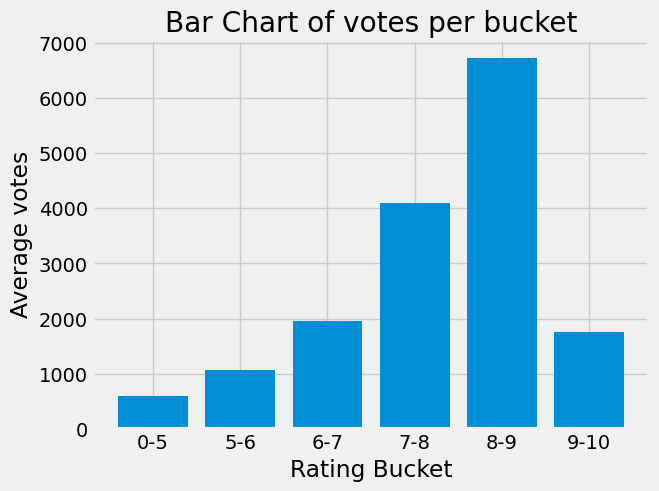

In [73]:
plt.title("Bar Chart of votes per bucket")

plt.xlabel('Rating Bucket')
plt.ylabel('Average votes')

plt.bar([0, 1, 2, 3, 4, 5], averageVotesSeries)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['0-5', '5-6', '6-7', '7-8', '8-9', '9-10'])
plt.show()